### Do the appropriate imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the data and print some stats

In [2]:
file_dir = 'data/synthetic_data.csv'
data = pd.read_csv(file_dir)

data.head()

,stock_price,volume,SMA_10,EMA_10,MACD,Signal_Line,RSI,Middle_Band,Upper_Band,Lower_Band
0,96.701750,93994.116412,95.428066,96.422704,0.168857,-0.175165,44.708746,96.277325,101.242267,91.312383
1,97.674168,156265.754022,95.863609,96.653658,0.243451,-0.090663,49.339052,96.161034,100.860708,91.461359
2,96.498361,144147.943454,96.273067,96.625076,0.219432,-0.028183,52.284716,96.071667,100.668070,91.475264
3,97.229575,179176.754592,96.509942,96.736084,0.247881,0.027358,58.912039,96.078065,100.680855,91.475274
4,96.458810,152196.901438,96.886625,96.685259,0.214062,0.064876,57.141145,96.052491,100.640068,91.464915


In [3]:
data.describe()

,stock_price,volume,SMA_10,EMA_10,MACD,Signal_Line,RSI,Middle_Band,Upper_Band,Lower_Band
count,9982.000000,9.982000e+03,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,182.183384,2.737057e+05,182.159761,182.159289,0.050346,0.054276,50.202733,182.131884,191.897716,172.366053
std,74.954647,1.614395e+05,74.847541,74.793059,3.559450,3.338409,18.280310,74.754688,79.240023,70.783118
min,63.050536,5.793810e+04,64.041382,64.315231,-14.502552,-12.420902,0.000000,64.459127,66.025921,58.659639
25%,115.498570,1.757706e+05,115.494846,115.219871,-1.845741,-1.743704,37.128613,115.407291,122.644523,107.959626
50%,183.022463,2.375792e+05,183.259029,183.483996,-0.037001,-0.046520,49.750206,183.617988,193.546219,172.118211
75%,233.434392,3.277300e+05,233.519187,233.541289,1.728378,1.639904,63.603294,234.125075,245.167755,221.133442
max,453.607594,3.934576e+06,408.845787,415.883115,22.904089,19.165652,97.953975,396.373539,451.606434,382.822486


In [4]:
data.corr()


,stock_price,volume,SMA_10,EMA_10,MACD,Signal_Line,RSI,Middle_Band,Upper_Band,Lower_Band
stock_price,1.000000,-0.023881,0.997164,0.998029,0.119519,0.124977,0.040227,0.994286,0.992191,0.989413
volume,-0.023881,1.000000,-0.023016,-0.023503,0.000405,0.003709,0.015100,-0.023601,-0.023338,-0.023725
SMA_10,0.997164,-0.023016,1.000000,0.999831,0.087904,0.110283,-0.004776,0.998466,0.995911,0.994078
EMA_10,0.998029,-0.023503,0.999831,1.000000,0.087098,0.106012,-0.001837,0.998514,0.995981,0.994102
MACD,0.119519,0.000405,0.087904,0.087098,1.000000,0.952113,0.660339,0.041230,0.051074,0.029910
Signal_Line,0.124977,0.003709,0.110283,0.106012,0.952113,1.000000,0.483604,0.070482,0.079209,0.060201
RSI,0.040227,0.015100,-0.004776,-0.001837,0.660339,0.483604,1.000000,-0.046482,-0.042482,-0.050623
Middle_Band,0.994286,-0.023601,0.998466,0.998514,0.041230,0.070482,-0.046482,1.000000,0.996942,0.996166
Upper_Band,0.992191,-0.023338,0.995911,0.995981,0.051074,0.079209,-0.042482,0.996942,1.000000,0.986282
Lower_Band,0.989413,-0.023725,0.994078,0.994102,0.029910,0.060201,-0.050623,0.996166,0.986282,1.000000


## Lets Visualize the data

### Stock price plot

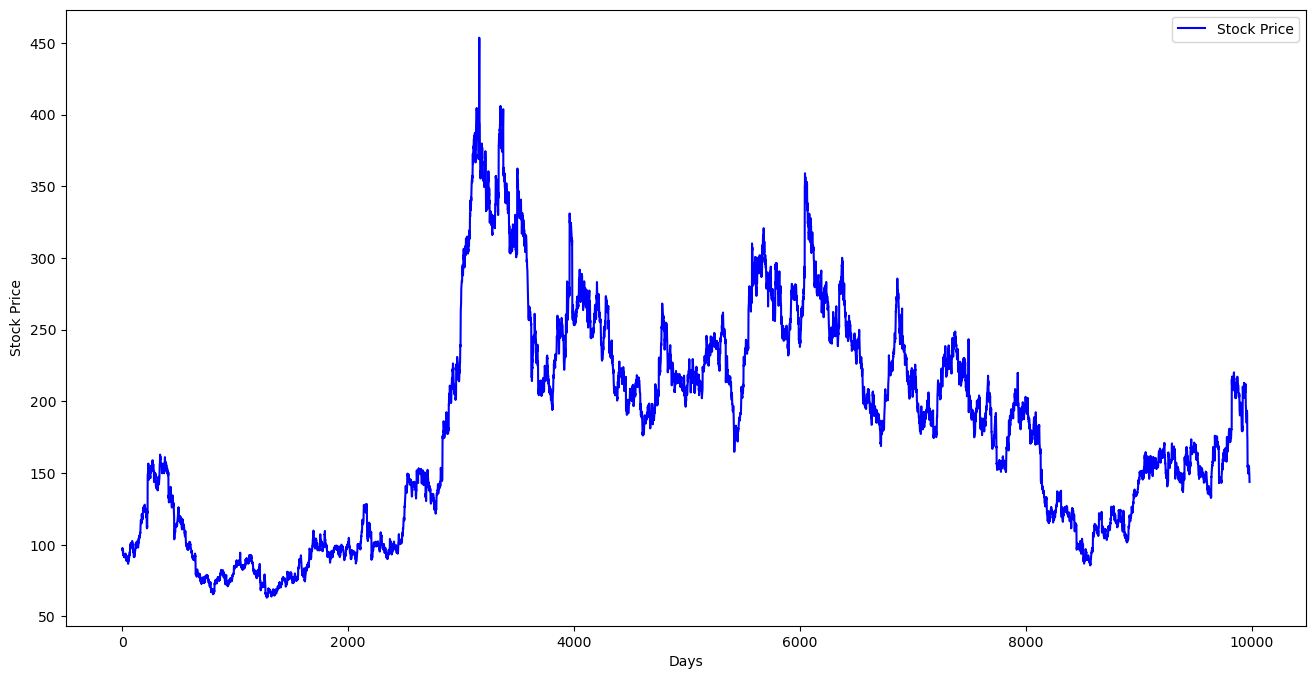

In [5]:
plt.figure(figsize=(16, 8))
plt.plot(data['stock_price'], label="Stock Price", color='blue')
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

### Volume plot

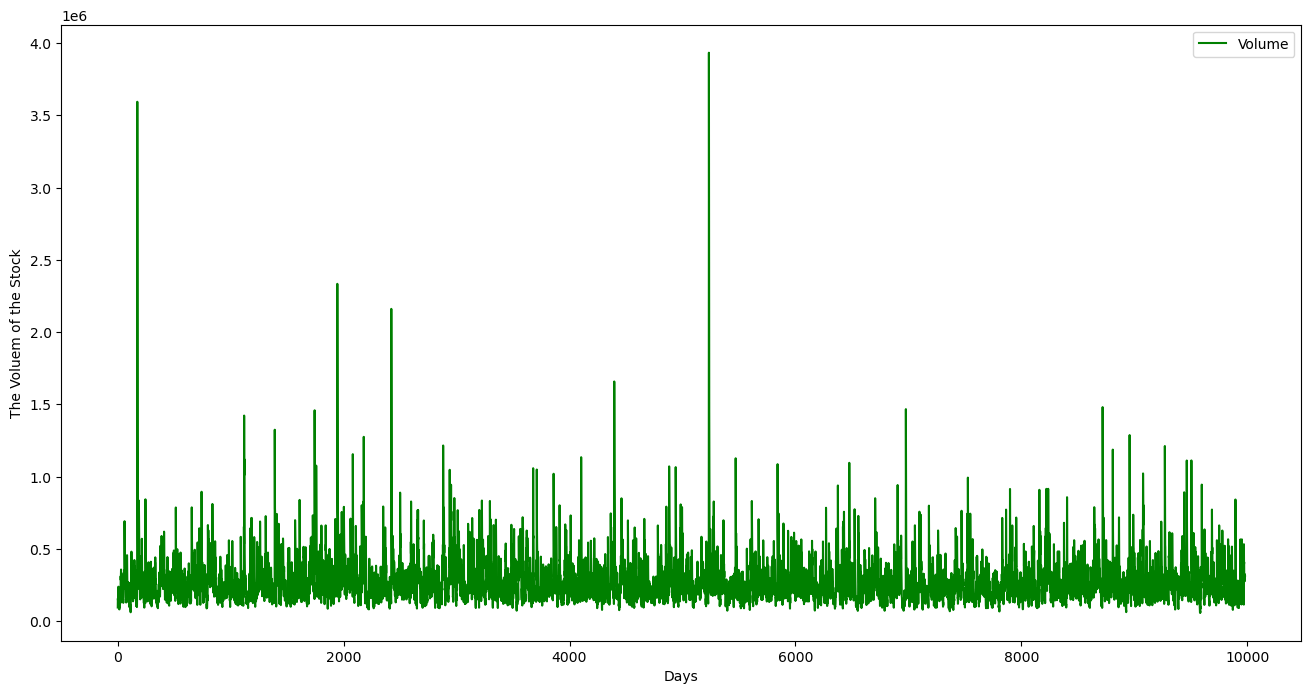

In [6]:
plt.figure(figsize=(16, 8))
plt.plot(data['volume'], label="Volume", color='green')
plt.xlabel("Days")
plt.ylabel("The Voluem of the Stock")
plt.legend()
plt.show()

### EMA plot

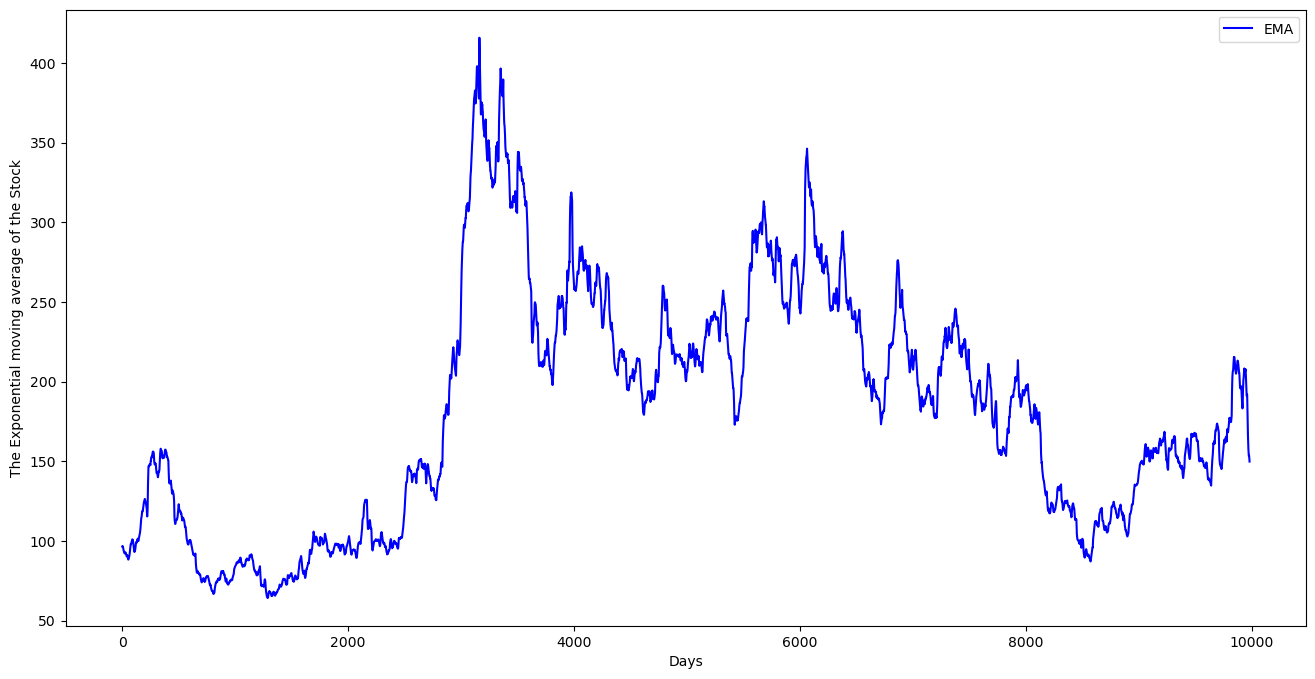

In [7]:
plt.figure(figsize=(16, 8))
plt.plot(data['EMA_10'], label="EMA", color='blue')
plt.xlabel("Days")
plt.ylabel("The Exponential moving average of the Stock")
plt.legend()
plt.show()

#### From the correlation matrix, we can see that the stock price and the average of the technical indicators are highly correlated, with a correlation of approximately 98–99%. This is also evident in the plots above. To address this issue, we will work with stock price returns instead.

### Transform the stock prices into returns

In [8]:
data['returns'] = data['stock_price'].pct_change()
data.head()

,stock_price,volume,SMA_10,EMA_10,MACD,Signal_Line,RSI,Middle_Band,Upper_Band,Lower_Band,returns
0,96.701750,93994.116412,95.428066,96.422704,0.168857,-0.175165,44.708746,96.277325,101.242267,91.312383,NaN
1,97.674168,156265.754022,95.863609,96.653658,0.243451,-0.090663,49.339052,96.161034,100.860708,91.461359,0.010056
2,96.498361,144147.943454,96.273067,96.625076,0.219432,-0.028183,52.284716,96.071667,100.668070,91.475264,-0.012038
3,97.229575,179176.754592,96.509942,96.736084,0.247881,0.027358,58.912039,96.078065,100.680855,91.475274,0.007577
4,96.458810,152196.901438,96.886625,96.685259,0.214062,0.064876,57.141145,96.052491,100.640068,91.464915,-0.007927


### Now we need to take care of the NaN values

In [9]:
data = data.dropna()
data.head()

,stock_price,volume,SMA_10,EMA_10,MACD,Signal_Line,RSI,Middle_Band,Upper_Band,Lower_Band,returns
1,97.674168,156265.754022,95.863609,96.653658,0.243451,-0.090663,49.339052,96.161034,100.860708,91.461359,0.010056
2,96.498361,144147.943454,96.273067,96.625076,0.219432,-0.028183,52.284716,96.071667,100.668070,91.475264,-0.012038
3,97.229575,179176.754592,96.509942,96.736084,0.247881,0.027358,58.912039,96.078065,100.680855,91.475274,0.007577
4,96.458810,152196.901438,96.886625,96.685259,0.214062,0.064876,57.141145,96.052491,100.640068,91.464915,-0.007927
5,95.322341,177280.000327,97.207497,96.435803,0.106256,0.073183,55.083601,95.879087,100.289679,91.468495,-0.011782


In [10]:
data.describe()

,stock_price,volume,SMA_10,EMA_10,MACD,Signal_Line,RSI,Middle_Band,Upper_Band,Lower_Band,returns
count,9981.000000,9.981000e+03,9981.000000,9981.000000,9981.000000,9981.000000,9981.000000,9981.000000,9981.000000,9981.000000,9981.000000
mean,182.191948,2.737238e+05,182.168451,182.167879,0.050334,0.054299,50.203284,182.140486,191.906799,172.374174,0.000180
std,74.953518,1.614376e+05,74.846255,74.791881,3.559628,3.338576,18.281143,74.753493,79.238796,70.782013,0.016792
min,63.050536,5.793810e+04,64.041382,64.315231,-14.502552,-12.420902,0.000000,64.459127,66.025921,58.659639,-0.191484
25%,115.522578,1.758020e+05,115.512567,115.238449,-1.845797,-1.744022,37.127699,115.422285,122.659055,107.982846,-0.007495
50%,183.044882,2.375852e+05,183.295389,183.498847,-0.038009,-0.046331,49.753280,183.621394,193.558876,172.121690,0.000022
75%,233.437070,3.277354e+05,233.527074,233.549863,1.728474,1.640152,63.603418,234.126006,245.170910,221.146062,0.007645
max,453.607594,3.934576e+06,408.845787,415.883115,22.904089,19.165652,97.953975,396.373539,451.606434,382.822486,0.223388


In [11]:
data.corr()


,stock_price,volume,SMA_10,EMA_10,MACD,Signal_Line,RSI,Middle_Band,Upper_Band,Lower_Band,returns
stock_price,1.000000,-0.024011,0.997163,0.998029,0.119531,0.124977,0.040195,0.994285,0.992190,0.989412,0.020012
volume,-0.024011,1.000000,-0.023148,-0.023634,0.000408,0.003702,0.015068,-0.023732,-0.023468,-0.023856,0.004696
SMA_10,0.997163,-0.023148,1.000000,0.999831,0.087914,0.110283,-0.004811,0.998465,0.995910,0.994078,-0.017167
EMA_10,0.998029,-0.023634,0.999831,1.000000,0.087107,0.106011,-0.001871,0.998514,0.995980,0.994101,-0.013762
MACD,0.119531,0.000408,0.087914,0.087107,1.000000,0.952113,0.660343,0.041236,0.051081,0.029916,0.054490
Signal_Line,0.124977,0.003702,0.110283,0.106011,0.952113,1.000000,0.483604,0.070479,0.079206,0.060197,0.004690
RSI,0.040195,0.015068,-0.004811,-0.001871,0.660343,0.483604,1.000000,-0.046520,-0.042519,-0.050661,0.241778
Middle_Band,0.994285,-0.023732,0.998465,0.998514,0.041236,0.070479,-0.046520,1.000000,0.996941,0.996165,-0.018033
Upper_Band,0.992190,-0.023468,0.995910,0.995980,0.051081,0.079206,-0.042519,0.996941,1.000000,0.986280,-0.016694
Lower_Band,0.989412,-0.023856,0.994078,0.994101,0.029916,0.060197,-0.050661,0.996165,0.986280,1.000000,-0.019401


In [12]:
data['buy_signals'] = data['returns'].apply(lambda x: 1 if x > 0 else 0)
data['buy_signals'] = data['buy_signals'].shift(-1)
data

,stock_price,volume,SMA_10,EMA_10,MACD,Signal_Line,RSI,Middle_Band,Upper_Band,Lower_Band,returns,buy_signals
1,97.674168,156265.754022,95.863609,96.653658,0.243451,-0.090663,49.339052,96.161034,100.860708,91.461359,0.010056,0.0
2,96.498361,144147.943454,96.273067,96.625076,0.219432,-0.028183,52.284716,96.071667,100.668070,91.475264,-0.012038,1.0
3,97.229575,179176.754592,96.509942,96.736084,0.247881,0.027358,58.912039,96.078065,100.680855,91.475274,0.007577,0.0
4,96.458810,152196.901438,96.886625,96.685259,0.214062,0.064876,57.141145,96.052491,100.640068,91.464915,-0.007927,0.0
5,95.322341,177280.000327,97.207497,96.435803,0.106256,0.073183,55.083601,95.879087,100.289679,91.468495,-0.011782,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9977,153.612276,313059.402520,150.984230,153.542493,-10.062245,-11.140000,43.461152,160.539059,191.780166,129.297952,-0.008675,0.0
9978,149.852551,275780.298791,150.833302,152.871594,-9.705881,-10.853176,39.094534,158.354073,185.749336,130.958809,-0.024475,0.0
9979,149.839778,299152.043349,150.782892,152.320355,-9.317089,-10.545959,39.631223,156.199574,178.437782,133.961365,-0.000085,0.0
9980,145.779559,301582.972371,150.260394,151.131119,-9.230194,-10.282806,29.210243,153.947709,169.560514,138.334905,-0.027097,0.0


In [13]:
# take care of the last row 
data = data.dropna()
data


,stock_price,volume,SMA_10,EMA_10,MACD,Signal_Line,RSI,Middle_Band,Upper_Band,Lower_Band,returns,buy_signals
1,97.674168,156265.754022,95.863609,96.653658,0.243451,-0.090663,49.339052,96.161034,100.860708,91.461359,0.010056,0.0
2,96.498361,144147.943454,96.273067,96.625076,0.219432,-0.028183,52.284716,96.071667,100.668070,91.475264,-0.012038,1.0
3,97.229575,179176.754592,96.509942,96.736084,0.247881,0.027358,58.912039,96.078065,100.680855,91.475274,0.007577,0.0
4,96.458810,152196.901438,96.886625,96.685259,0.214062,0.064876,57.141145,96.052491,100.640068,91.464915,-0.007927,0.0
5,95.322341,177280.000327,97.207497,96.435803,0.106256,0.073183,55.083601,95.879087,100.289679,91.468495,-0.011782,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,154.956544,327124.593252,150.906221,153.526985,-10.753544,-11.409439,21.982637,162.463843,196.524316,128.403370,0.034981,0.0
9977,153.612276,313059.402520,150.984230,153.542493,-10.062245,-11.140000,43.461152,160.539059,191.780166,129.297952,-0.008675,0.0
9978,149.852551,275780.298791,150.833302,152.871594,-9.705881,-10.853176,39.094534,158.354073,185.749336,130.958809,-0.024475,0.0
9979,149.839778,299152.043349,150.782892,152.320355,-9.317089,-10.545959,39.631223,156.199574,178.437782,133.961365,-0.000085,0.0


### Lets visualize the new data



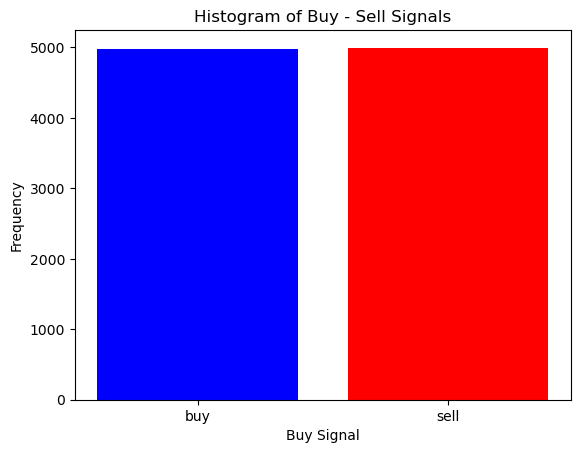

In [14]:
# Plot bar chart
counts = [data['buy_signals'].value_counts()[0], data['buy_signals'].value_counts()[1]]
plt.bar(['buy', 'sell'], counts, color = ['blue', 'red'])
plt.xlabel('Buy Signal')
plt.ylabel('Frequency')
plt.title('Histogram of Buy - Sell Signals')
plt.show()

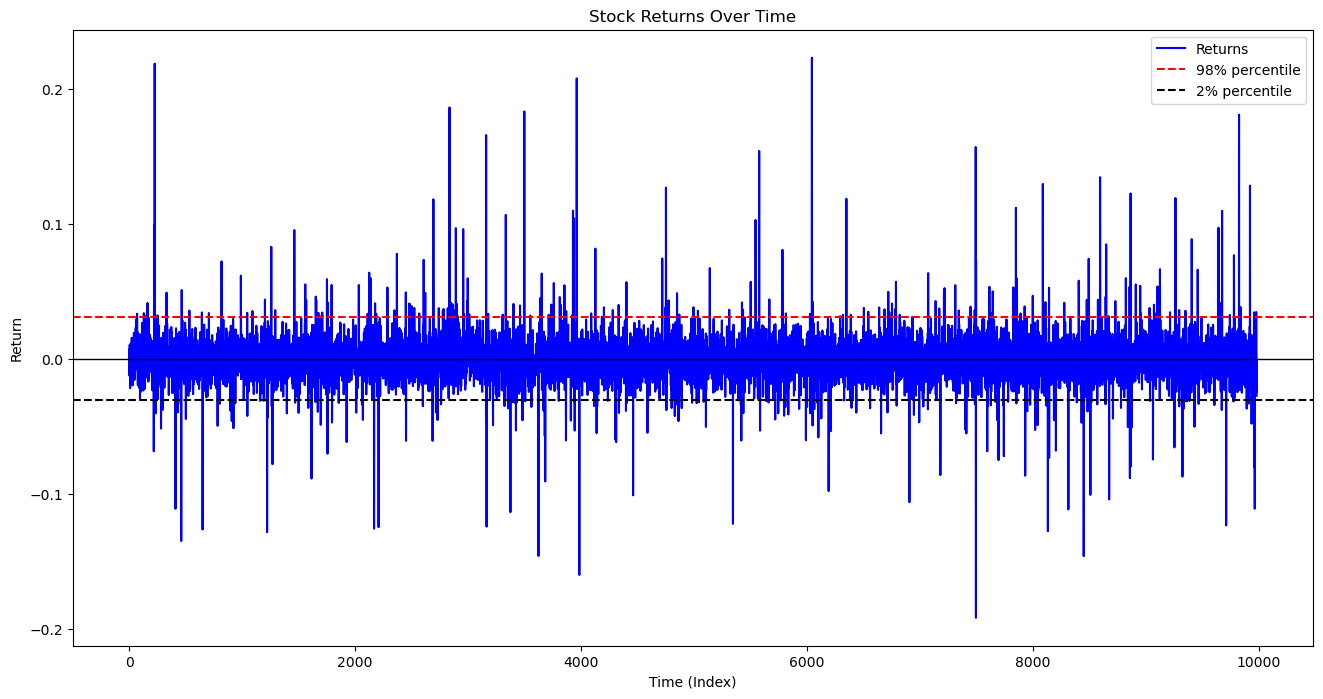

In [15]:
plt.figure(figsize=(16, 8))
plt.plot(data['returns'], linestyle='-', color='blue', label='Returns')

# Calculate the 98th and 2nd percentiles of the 'returns' column and add them as horizontal lines
plt.axhline(data['returns'].quantile(0.98), color='red', linestyle='--', linewidth=1.5, label='98% percentile')
plt.axhline(data['returns'].quantile(0.02), color='black', linestyle='--', linewidth=1.5, label='2% percentile')

# Labels and styling
plt.title('Stock Returns Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Return')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)  # Baseline
plt.grid(False)

# Add a legend
plt.legend()
plt.show() 

### Post process 

#### As was depicted earlier, from our analysis, the stock price and the average of the technical indicators are highly correlated, so the strategy that we will follow falls aparts in the creation of two datasets:
1. Drop the columns with high correlation and keep the following features:

* returns
* EMA_10 
* MACD
* Signal Line 
* RSI 
* Volume

2. Keep the full dataset and perform PCA and keep the same compemonents as the number of features of the first dataset (i.e the dataset from the previous step), in order to juice some extra information from the data.

In [30]:
data['buy_signals'].to_csv('processed_data/y_data.csv', index=False)
# keep the full data 2nd strategy
data.drop(columns=['buy_signals', 'stock_price'], inplace=False).to_csv('processed_data/x_full_data.csv', index=False)
# 1rst strategy
data[['returns', 'EMA_10', 'MACD', 'Signal_Line', 'RSI', 'volume']].to_csv('processed_data/x_uncorrelated_data.csv', index=False)